In [1]:
'''Twitter Sentiment Analysis Using Sklearn and NLTK'''

'Twitter Sentiment Analysis Using Sklearn and NLTK'

In [2]:
# importing some required libraries
import pandas as pd
from nltk.corpus import stopwords
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt



In [3]:
# reading the dataset
columns = ["sentiment", "id", "date", "text"]
df = pd.read_csv("noHeaderFinalDataSect1.csv", encoding="latin", names=columns)
df.head()





,sentiment,id,date,text
0,0,5.400000e+17,2014-12-03 07:01:05+00:00,conniempp wwi began in sarajevo wwiii to begin...
1,0,1.320000e+18,2020-10-24 17:05:38+00:00,nsheth4 janet63388900 alivelshi pretty sure yo...
2,0,6.420000e+17,2015-09-11 16:33:44+00:00,immigration is stressful for all immigrants go...
3,0,1.080000e+18,2019-01-07 15:39:48+00:00,motorcitihawk relbtx ingrahamangle wolfblitzer...
4,1,4.360000e+17,2014-02-20 02:41:36+00:00,christiisilvaxx you can get somethin better wi...


In [4]:
# replacing the '4' with '1' as positive sentiment
#df["sentiment"] = df["sentiment"].replace(4,1)      Commented out because don't need to replace 4 with 1

<AxesSubplot:xlabel='sentiment', ylabel='count'>

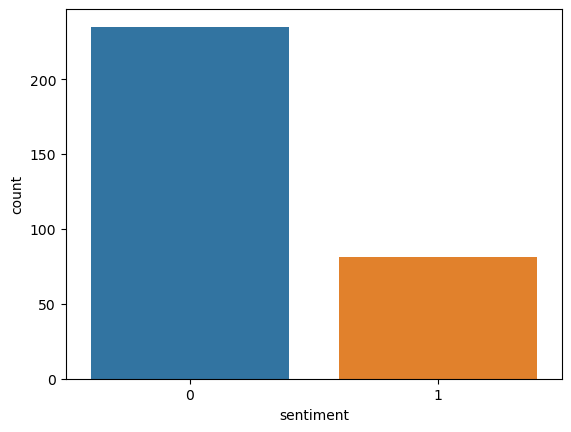

In [5]:
# plotting the data using countplot
sns.countplot(x="sentiment",data=df)

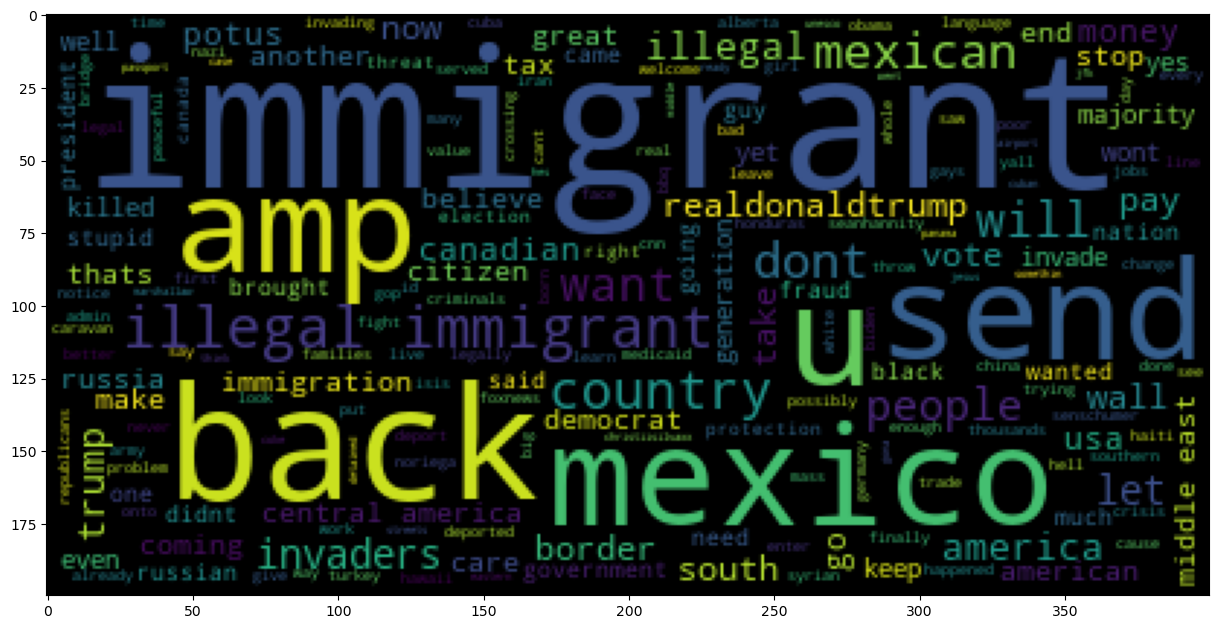

In [6]:
#creating a string of xenophobic tweets to analyze the words
positive_tweets = df[df['sentiment'] == 1]['text'].tolist()
positive_tweets_string = " ".join(positive_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(positive_tweets_string))

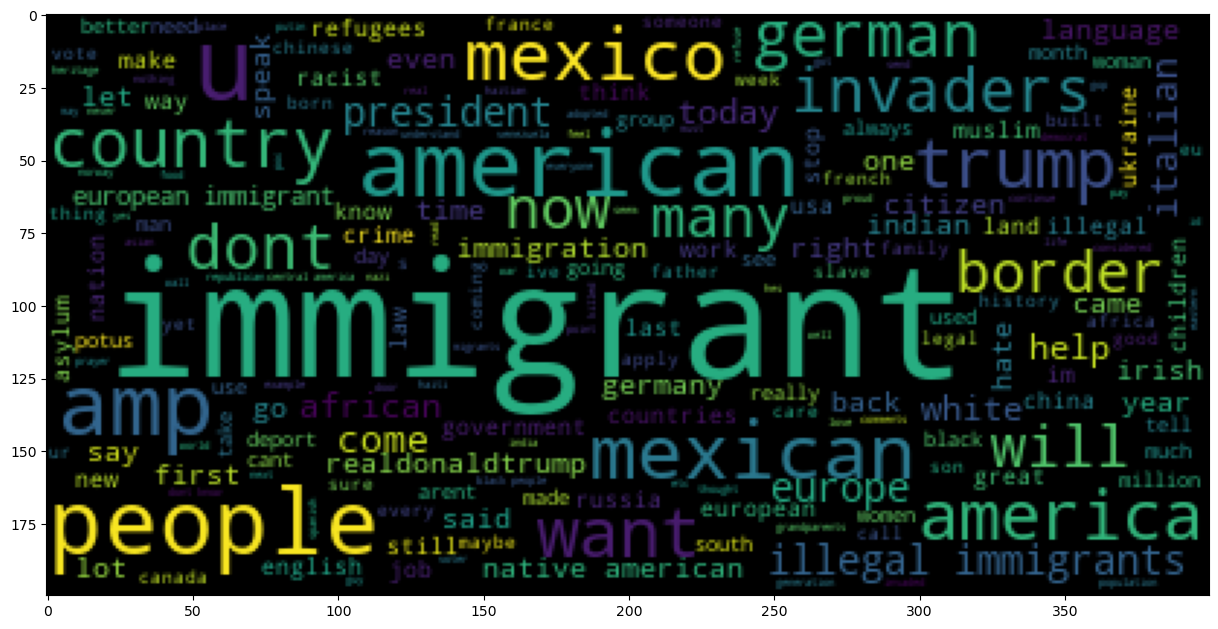

In [7]:
# creating the string of benign tweets to analyze the words
negative_tweets = df[df['sentiment'] == 0]['text'].tolist()
negative_tweets_string = " ".join(negative_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(negative_tweets_string))

In [8]:
def tweets_cleaner(tweet):
    # removing the urls from the text
    tweet = re.sub(r'((www.\S+)|(https?://\S+))', r"", tweet)   # maybe this should be http not https
    #removing the numbers from the text
    tweet = re.sub(r'[0-9]\S+', r'', tweet)
    #removing the tags from the text
    tweet = re.sub(r'(@\S+) | (#\S+)', r'', tweet)
    # removing the punctuation from the text
    tweet_without_punctuation = [char for char in tweet if char not   
                                in string.punctuation]
    # converting the list to string 
    tweet_without_punctuation = "".join(tweet_without_punctuation) 
    # set of stop words 
    stop_words = set(stopwords.words("english"))                      # take out stopwords
    # removing the stop words 
    tweet_without_stopwords = [word for word in  
                              tweet_without_punctuation.split()
                              if word.lower() not in stop_words]
    return tweet_without_stopwords

In [9]:
# extract the features using count vectorizer 
vectorizer = CountVectorizer(analyzer = tweets_cleaner, dtype =     
                            'uint8')
df_countvectorizer = vectorizer.fit_transform(df['text'])
df_countvectorizer.shape

(316, 2718)

In [10]:
# splitting the features into train and test
X_train, X_test, y_train, y_test = train_test_split(  
                                                df_countvectorizer,  
                                                df["sentiment"],   # changed from target to sentiment as per "Loading the Dataset"
                                                test_size=.2,      # test size of 20% of data
                                                 random_state=0)




In [11]:
# Multinomial Naive Bayes Classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [12]:
# predicting the labels  ... X_train contains features of tweets. y_train contains the target column 'sentiment'


pred = classifier.predict(X_test)      # This is a numpy array of predicted sentiment values for the tested tweets
print(pred)




[0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0
 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0]


In [13]:
# model accuracy
print(classification_report(y_test, pred))   # we are comparing y_test vs pred, and seeing the accuracy.

              precision    recall  f1-score   support

           0       0.71      0.55      0.62        44
           1       0.33      0.50      0.40        20

    accuracy                           0.53        64
   macro avg       0.52      0.52      0.51        64
weighted avg       0.59      0.53      0.55        64



In [14]:
# ----------------------Predicting 'sentiment' for unevaluated data------------------------


#Read in the unevaluated data

columns = ["sentiment", "id", "date", "text"]
df_unevaluated = pd.read_csv("noHeaderFinalDataSect3.csv", encoding="latin", names=columns)
df_unevaluated.head()


,sentiment,id,date,text
0,0,9.820000e+17,2018-04-05 11:43:31+00:00,but if she had stated another fact like that i...
1,0,1.170000e+18,2019-09-03 22:53:30+00:00,the funniest thing trump has done this week is...
2,0,1.140000e+18,2019-06-28 17:43:07+00:00,i think immigrants of all walks of life should...
3,0,2.810000e+17,2012-12-18 00:43:57+00:00,why is america not treating the illegal immigr...
4,0,8.310000e+17,2017-02-14 01:42:26+00:00,who the hell wants to live in canada anyhow it...


In [15]:
# extract the features using count vectorizer 
vectorizer = CountVectorizer(analyzer = tweets_cleaner, dtype =     
                            'uint8')
df_cv_uneval = vectorizer.fit_transform(df_unevaluated['text'].values.astype('U'))
df_cv_uneval.shape

(62433, 91359)

In [16]:
# Predict sentiment column
pred_unevaluated = classifier.predict(df_cv_uneval)    # predicted sentiment

ValueError: X has 91359 features, but MultinomialNB is expecting 2718 features as input.

In [ ]:
df_unevaluated['sentiment'] = pred_unevaluated




# Replace old sentiment column with pred_unevaluated

# You can put pred_unevaluated into a dictionary, then a dataframe, and then
# Store the sentiment column of pred_unevaluated's dataframe in the 'sentiment' column of df_unevaluated
# Then, write out df_unevaluated to a csv.

In [ ]:
print(df_unevaluated)